<a href="https://colab.research.google.com/github/MuralidharB/tft-stocks/blob/master/Copy_of_DeepAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installation
!pip install --upgrade mxnet==1.6.0
!pip install gluonts
!pip install yfinance
!pip install datasets

In [ ]:
import yfinance as yahooFinance
import tensorflow as tf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

stocks = ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'UNH', 'XOM', 'JNJ', 'V', 'JPM', 'NVDA', 
          'WMT', 'TSLA', 'PG', 'META', 'MA', 'CVX', 'LLY', 'HD', 'ABBV', 'MRK', 'BAC', 'KO', 
          'PFE', 'PEP', 'AVGO', 'ORCL', 'TMO', 'COST', 'CSCO', 'ABT', 'MCD', 'NKE', 'DHR', 
          'TMUS', 'ACN', 'DIS', 'VZ', 'NEE', 'CMCSA', 'WFC', 'TXN', 'LIN', 'PM', 'UPS', 'ADBE', 
          'BMY', 'SCHW', 'MS', 'CRM', 'COP', 'RTX', 'AMGN', 'NFLX', 'HON', 'T', 'UNP', 'QCOM', 
          'IBM', 'DE', 'CAT', 'LOW', 'BA', 'SBUX', 'INTC', 'SPGI', 'LMT', 'GS', 'CVS', 'BLK', 
          'AXP', 'ELV', 'AMD', 'GILD', 'INTU', 'PLD', 'MDT', 'AMT', 'ADP', 'SYK', 'ISRG', 
          'TJX', 'EL', 'C', 'CB', 'CI', 'MDLZ', 'AMAT', 'PYPL', 'ADI', 'BKNG', 'MMC', 'MO', 'GE', 
          'DUK', 'SLB', 'SO', 'PGR', 'NOW', 'NOC', 'VRTX', 'EOG', 'REGN', 'ZTS', 'TGT', 'MRNA', 'BDX', 
          'MMM', 'HCA', 'USB', 'ITW', 'APD', 'CSX', 'GD', 'PNC', 'BSX', 'CL', 'WM', 'EQIX', 'FISV', 'FCX', 
          'CME', 'ETN', 'CCI', 'AON', 'SHW', 'LRCX', 'MU', 'TFC', 'HUM', 'ATVI', 'ICE', 'KLAC', 'NSC', 
          'CHTR', 'OXY', 'EMR', 'MET', 'PXD', 'MPC', 'MCO', 'MCK', 'DG', 'GM', 'MNST', 'KHC', 'ORLY', 
          'D', 'VLO', 'SNPS', 'SRE', 'F', 'KDP', 'AEP', 'GIS', 'PSA', 'MAR', 'PSX', 'ROP', 'FDX', 'EW', 
          'ADM', 'APH', 'AIG', 'JCI', 'HSY', 'A', 'KMB', 'AZO', 'CTAS', 'CDNS', 'TRV', 'AFL', 'HES', 'CTVA', 
          'MSI', 'EXC', 'ECL', 'CNC', 'NXPI', 'DXCM', 'PAYX', 'NEM', 'KMI', 'ADSK', 'TT', 'MCHP', 'DVN', 
          'ROST', 'LVS', 'FIS', 'AJG', 'STZ', 'BIIB', 'SYY', 'CMG', 'O', 'RSG', 'IQV', 'PH', 'XEL', 'DOW', 
          'SPG', 'WMB', 'TEL', 'MSCI', 'IDXX', 'BK', 'NUE', 'LHX', 'FTNT', 'COF', 'ALL', 'HAL', 'PRU', 'CARR', 
          'DD', 'TDG', 'YUM', 'ANET', 'HLT', 'PCAR', 'CMI', 'ED', 'ABC', 'EA', 'AMP', 'OTIS', 'WELL', 'MTD', 
          'ODFL', 'SBAC', 'KR', 'AME', 'DLTR', 'VICI', 'DHI', 'ROK', 'WBA', 'KEYS', 'PEG', 'PCG', 'CSGP', 
          'CTSH', 'ENPH', 'RMD', 'OKE', 'WEC', 'BKR', 'NDAQ', 'WBD', 'ILMN', 'PPG', 'GLW', 'STT', 'LYB', 
          'ES', 'IFF', 'DLR', 'AWK', 'VRSK', 'DFS', 'HPQ', 'GWW', 'GPN', 'WTW', 'ON', 'FAST', 'LEN', 'CEG', 
          'APTV', 'TROW', 'URI', 'IT', 'ALB', 'CBRE', 'ZBH', 'EIX', 'MTB', 'CDW', 'ULTA', 'EFX', 'HRL', 'FANG', 
          'TSCO', 'EBAY', 'DAL', 'FE', 'VMC', 'HIG', 'ARE', 'K', 'RJF', 'GPC', 'TSN', 'FITB', 'WY', 'FTV', 
          'ACGL', 'DTE', 'BAX', 'AEE', 'IR', 'AVB', 'FRC', 'MKC', 'VRSN', 'PPL', 'EQR', 'ETR', 'HPE', 'LH', 
          'ANSS', 'LUV', 'PFG', 'MLM', 'HBAN', 'XYL', 'RF', 'CAH', 'WAT', 'CFG', 'STE', 'PWR', 'CHD', 'HOLX', 
          'CTRA', 'NTRS', 'VTR', 'EXR', 'DOV', 'CAG', 'CNP', 'WRB', 'TDY', 'GRMN', 'CMS', 'EPAM', 'STLD', 'BBY', 
          'WST', 'WAB', 'DRI', 'FSLR', 'INVH', 'MPWR', 'AES', 'JBHT', 'ALGN', 'AMCR', 'ROL', 'PAYC', 'MAA', 'IEX', 
          'INCY', 'TTWO', 'BALL', 'OMC', 'CLX', 'DGX', 'CINF', 'EXPD', 'MRO', 'MOH', 'KEY', 'COO', 'BRO', 'TRGP', 
          'SEDG', 'FOX', 'FOXA', 'PKI', 'SJM', 'HWM', 'CPB', 'LYV', 'BR', 'CF', 'FMC', 'J', 'ATO', 'ETSY', 'FDS', 
          'SWKS', 'UAL', 'ZBRA', 'NVR', 'AVY', 'MOS', 'SIVB', 'PTC', 'RCL', 'LKQ', 'MGM', 'SYF', 'TXT', 'TER', 
          'EVRG', 'CPRT', 'BEN', 'IRM', 'VTRS', 'EXPE', 'FLT', 'LW', 'GEN', 'PEAK', 'L', 'KIM', 'APA', 'IPG', 
          'ESS', 'NTAP', 'RE', 'NDSN', 'LNT', 'AKAM', 'LDOS', 'IP', 'TYL', 'TRMB', 'SNA', 'UDR', 'PARA', 'JKHY', 
          'CBOE', 'CE', 'BIO', 'POOL', 'MTCH', 'EQT', 'SWK', 'PKG', 'WDC', 'TFX', 'MKTX', 'CPT', 'DPZ', 'CRL', 'GL', 
          'STX', 'HST', 'VFC', 'MAS', 'NWS', 'NWSA', 'NI', 'PHM', 'CHRW', 'WYNN', 'HSIC', 'CCL', 'EMN', 'KMX', 'REG', 
          'BXP', 'UHS', 'BBWI', 'JNPR', 'TPR', 'BWA', 'AAL', 'ALLE', 'QRVO', 'CZR', 'CDAY', 'WRK', 'AOS', 'AAP', 'HII', 
          'HAS', 'IVZ', 'CMA', 'FFIV', 'CTLT', 'PNW', 'WHR', 'FRT', 'RHI', 'PNR', 'DISH', 'SEE', 'RL', 'ZION', 'OGN', 
          'NRG', 'XRAY', 'MHK', 'DVA', 'SBNY', 'GNRC', 'AIZ', 'DXC', 'NWL', 'ALK', 'NCLH', 'LUMN', 'LNC', 'VNO', 'TECH', 
          'TAP', '^IXIC', '^GSPC', '^DJI']

stocks_ts = pd.DataFrame()
for stock in stocks:
    data = yahooFinance.Ticker(stock).history(period="10y")
    d = data.copy()[['Open', 'Volume']]
    stocks_ts.insert(0, stock+"_Open", d['Open'])
    stocks_ts.insert(0, stock+"_Volume", d['Volume'])

print(stocks_ts)

# add other indicators
# inflation rate, interest rate, employment

fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    stocks_ts[stocks_ts.columns[i]].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("Open")   
    axx[i].grid(which='minor', axis='x')

In [ ]:
import pandas as pd
infvalues=pd.read_csv("sample_data/Book2.csv")
infvalues=infvalues.drop(["Year", "Annual"], axis=1).values
inf=[]
for i in infvalues:
  inf = inf + list(i)

dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-12-31 00:00:00-05:00", freq="M")

inf.reverse()
csvdf=pd.DataFrame(inf)
csvdf.index=dti

dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-12-31 00:00:00-05:00", freq="D")
dti.name = 'date'
csvdf=csvdf.reindex(dti, method='ffill')
csvdf.columns = ["Rates"]
stocks_ts = stocks_ts.assign(Inflation=csvdf["Rates"])

print(stocks_ts)

In [ ]:
import pandas as pd
fedrates=pd.read_csv("sample_data/fed-funds-rate-historical-chart.csv")

#fedrates = fedrates.drop("date", axis=1)
dti=pd.date_range(start="1955-12-12 00:00:00-05:00", end="2023-01-31 00:00:00-05:00", freq="D")
fedrates.index = dti
stocks_ts = stocks_ts.assign(InterestRates=fedrates["value"])

In [ ]:
import pandas as pd
unemplrates=pd.read_csv("sample_data/us-national-unemployment-rate.csv")

#fedrates = fedrates.drop("date", axis=1)
dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-07-01 00:00:00-05:00", freq="M")
unemplrates.index = dti
stocks_ts = stocks_ts.assign(InteresUnemploymentRates=unemplrates["value"])

dti=pd.date_range(start="1948-01-01 00:00:00-05:00", end="2023-07-01 00:00:00-05:00", freq="D")
dti.name = 'date'
unemplrates=unemplrates.reindex(dti, method='ffill')

stocks_ts = stocks_ts.assign(UnemploymentRates=unemplrates["value"])
print(stocks_ts)

In [ ]:
!pip install -q datasets
from datasets import Dataset, DatasetDict
l = stocks_ts.shape[0]
train = Dataset.from_pandas(stocks_ts[:-259])
l = l-259
validation = Dataset.from_pandas(stocks_ts[l:l+24])
l = l + 24
test = Dataset.from_pandas(stocks_ts[l:])
dataset = DatasetDict({"train":train, "validation":validation, "test":test})

In [ ]:
train_data = stocks_ts[:-259]
test_data = stocks_ts

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName


def to_deepar_format(dataframe):
    freq = pd.infer_freq(dataframe.index) 
    if not freq:
        freq = 'D'
    start_index = dataframe.index.min()
    data = [{
                FieldName.START:  start_index,
                FieldName.TARGET:  dataframe[c].values,
                FieldName.ITEM_ID: c,
            } 
            for c in dataframe.columns]
    return ListDataset(data, freq=freq)
train_data_lds = to_deepar_format(train_data)
test_data_lds = to_deepar_format(test_data)
train_data_lds

In [ ]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

prediction_length = 24
context_length = 24
num_cells = 32
num_layers = 2
epochs= 200
freq="D"

estimator =   DeepAREstimator(freq=freq, 
                                context_length=context_length,
                                prediction_length=prediction_length,
                                num_layers=num_layers,
                                num_cells=num_cells,
                                cardinality=[1],
                                trainer=Trainer(epochs=epochs))

In [ ]:
predictor = estimator.train(train_data_lds)

In [ ]:
from gluonts.evaluation.backtest import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data_lds,  
    predictor=predictor,   
)
tss = list(ts_it)
forecasts = list(forecast_it)


In [ ]:
forecasts[1]


In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_length
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]
    fig, ax = plt.subplots(1, 1, figsize=(20, 24))
    ts_entry[-plot_length:].plot(ax=ax)  
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.suptitle(forecast_entry.item_id)
    plt.show()

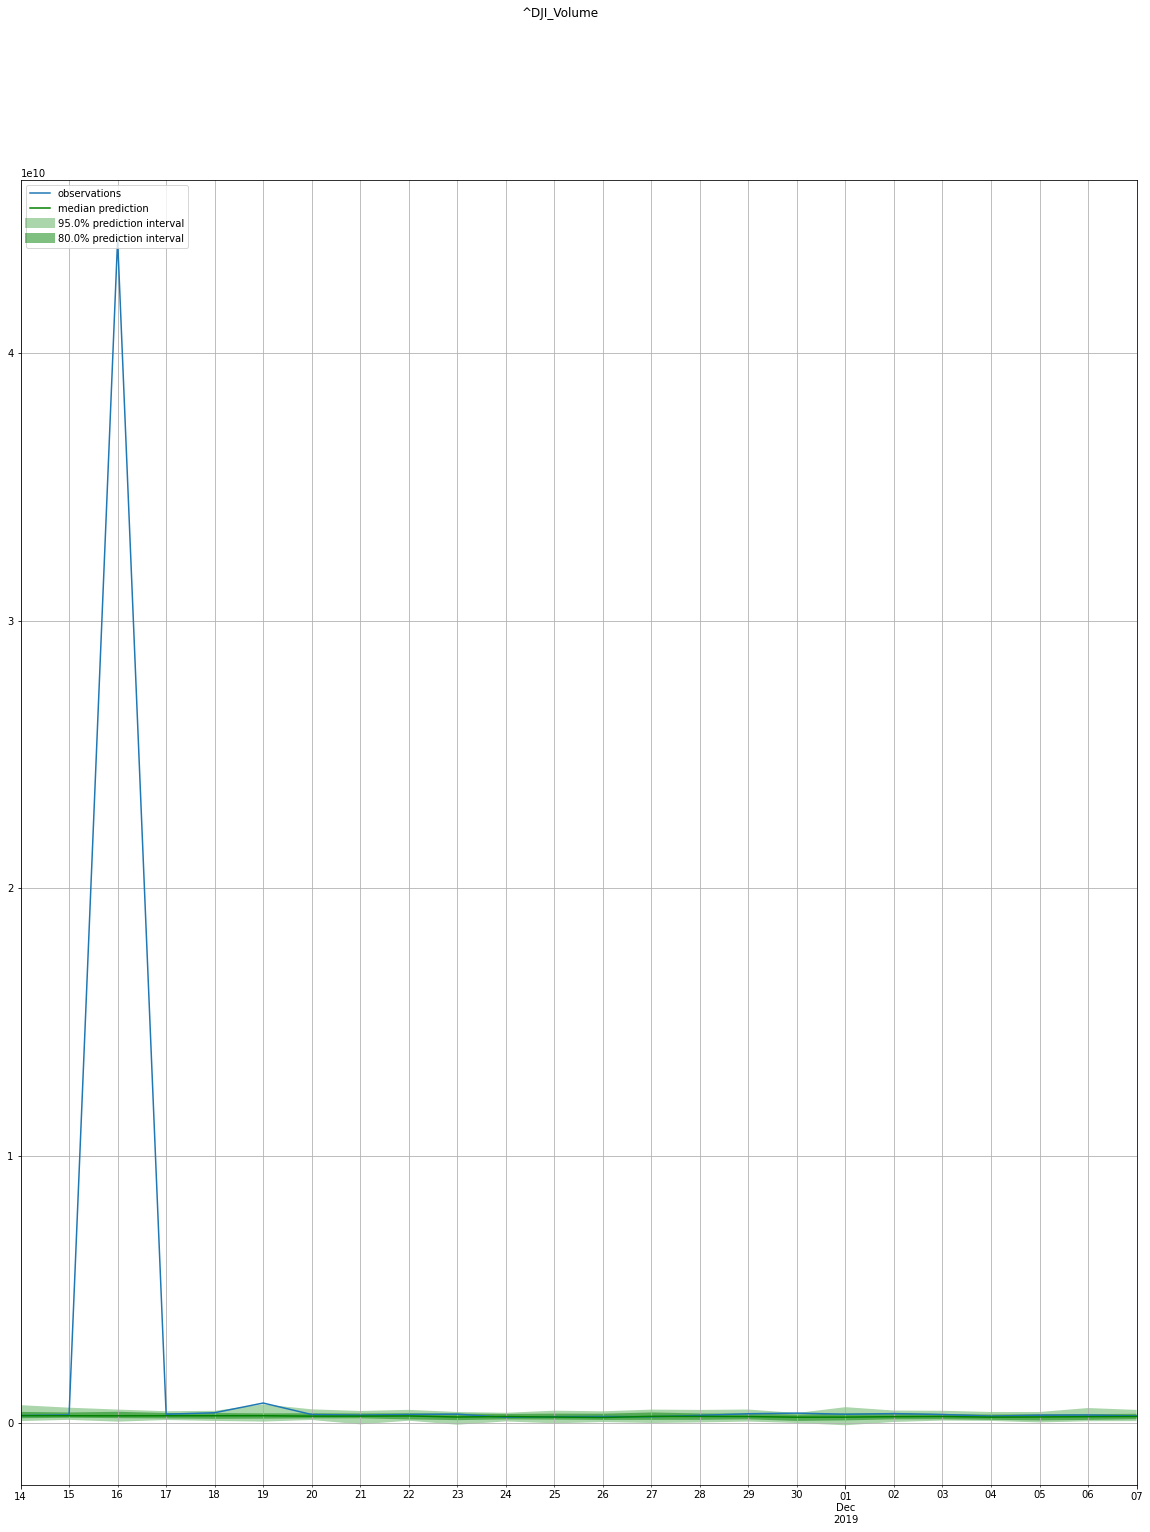

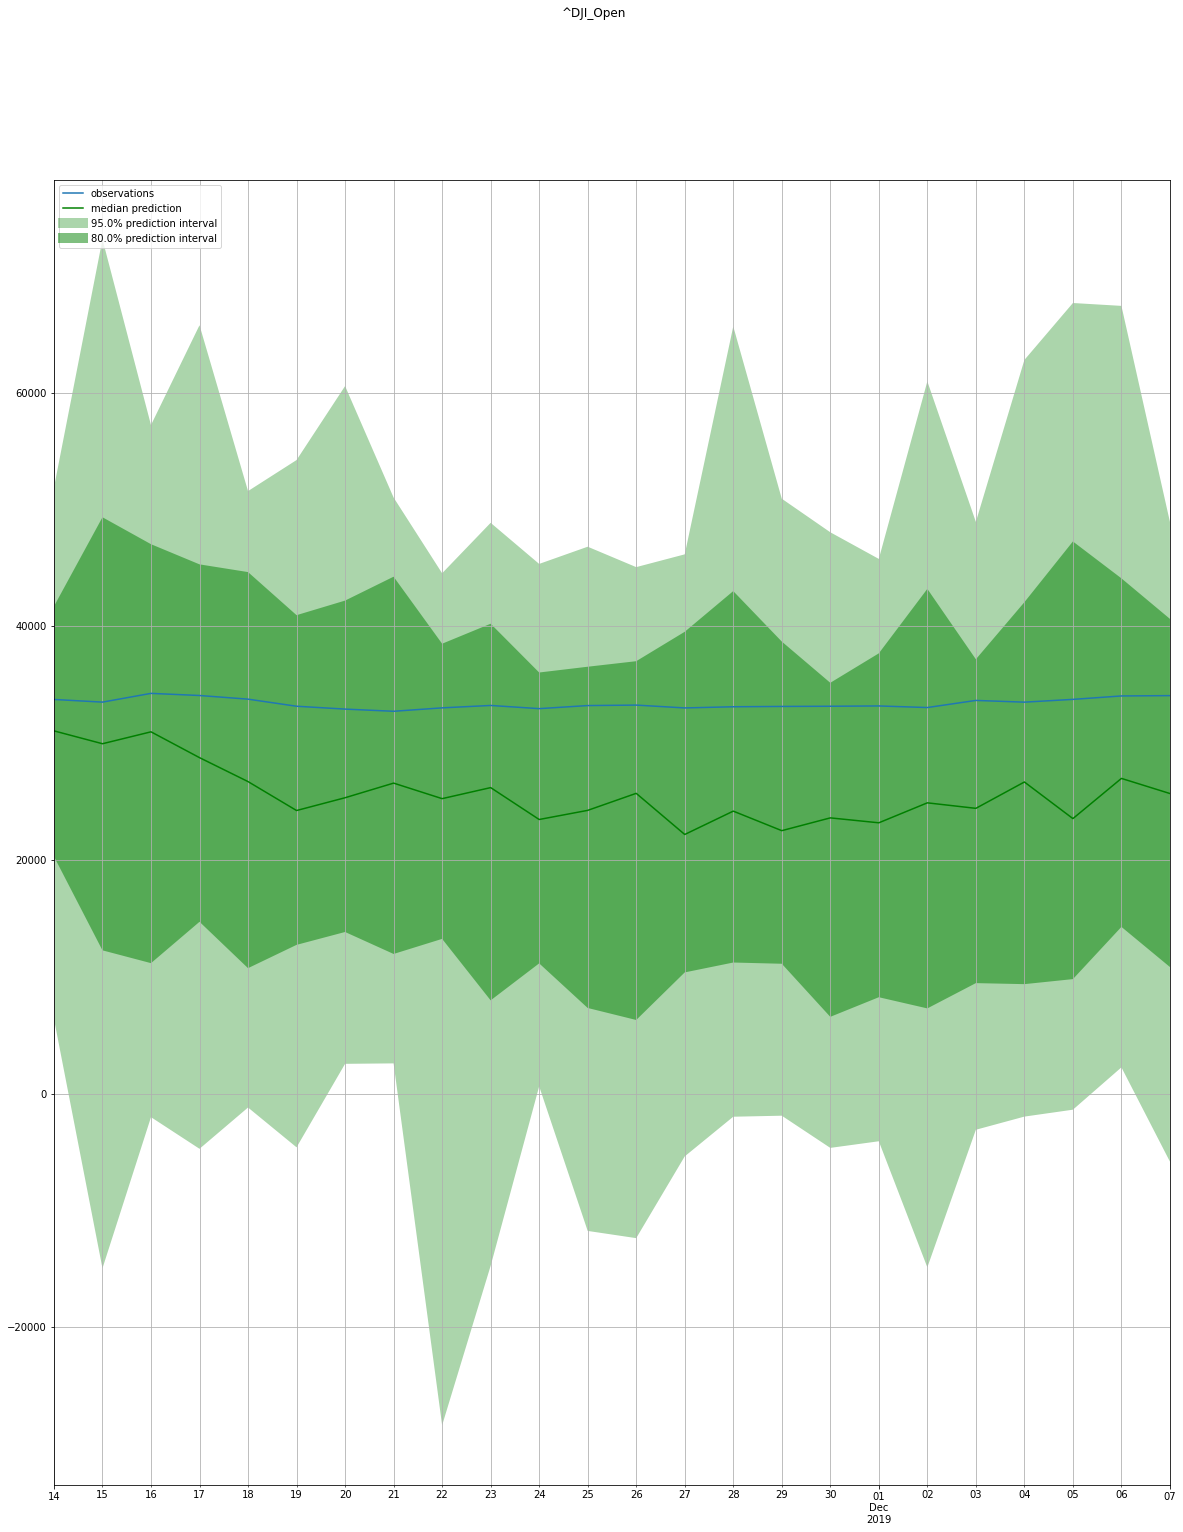

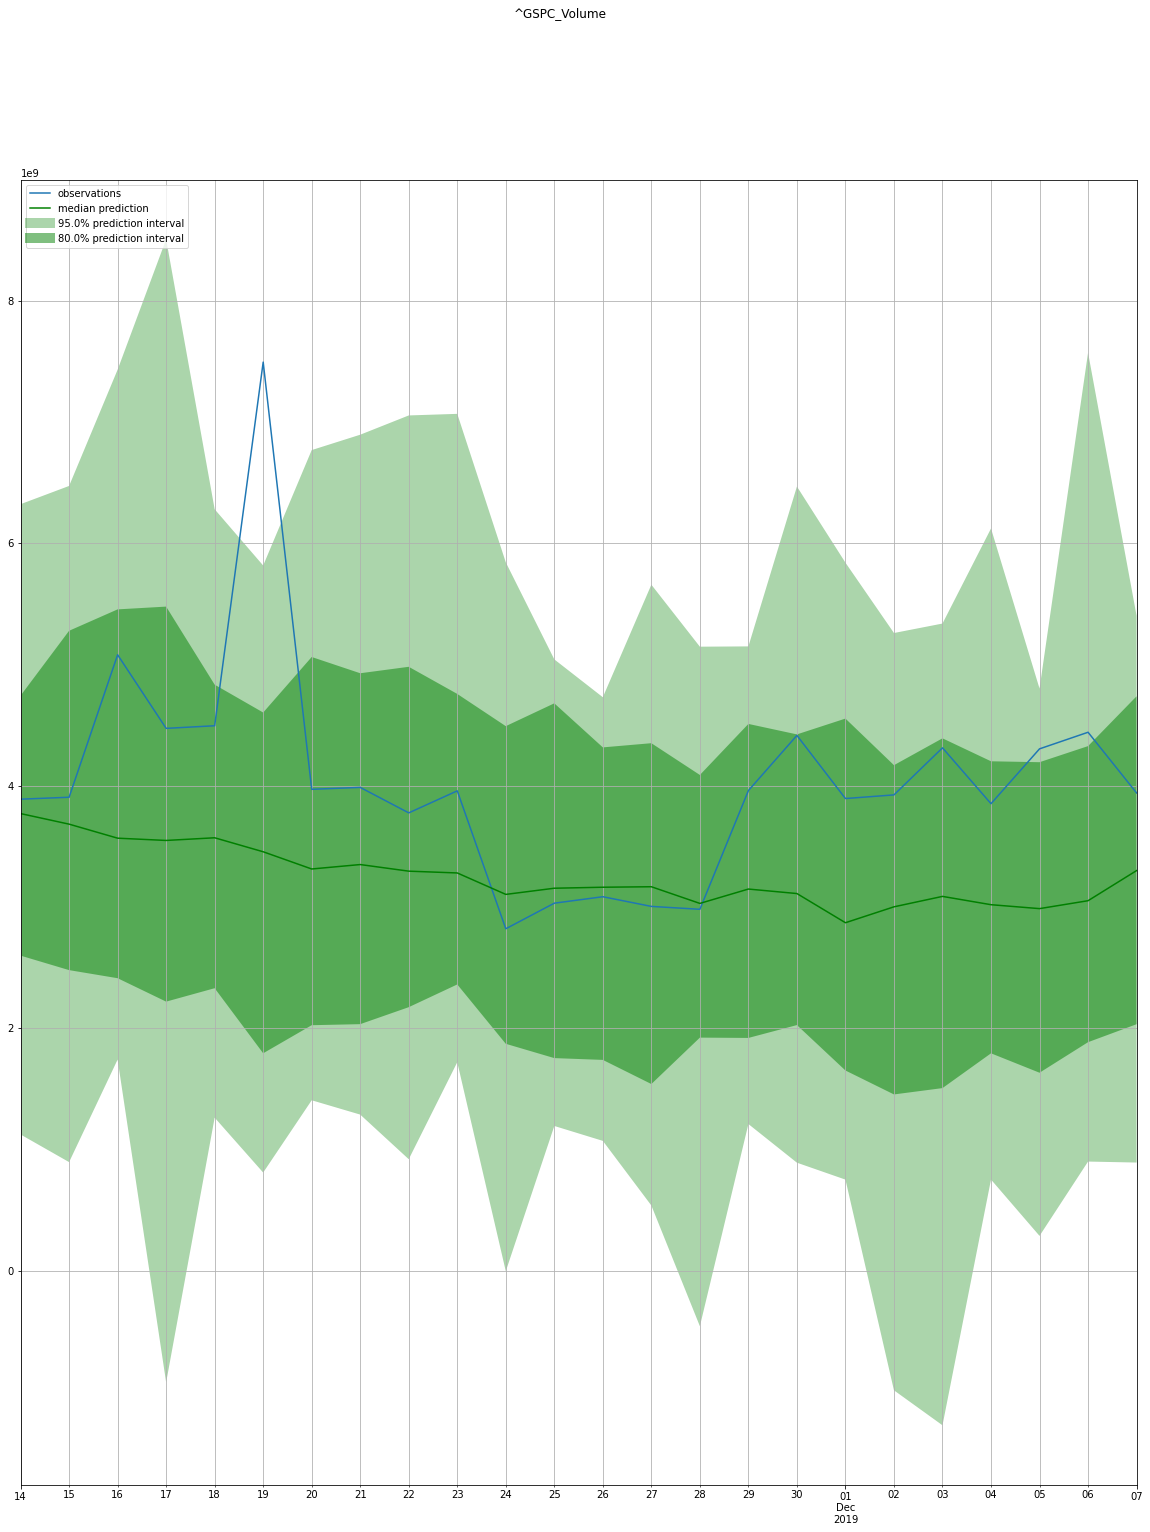

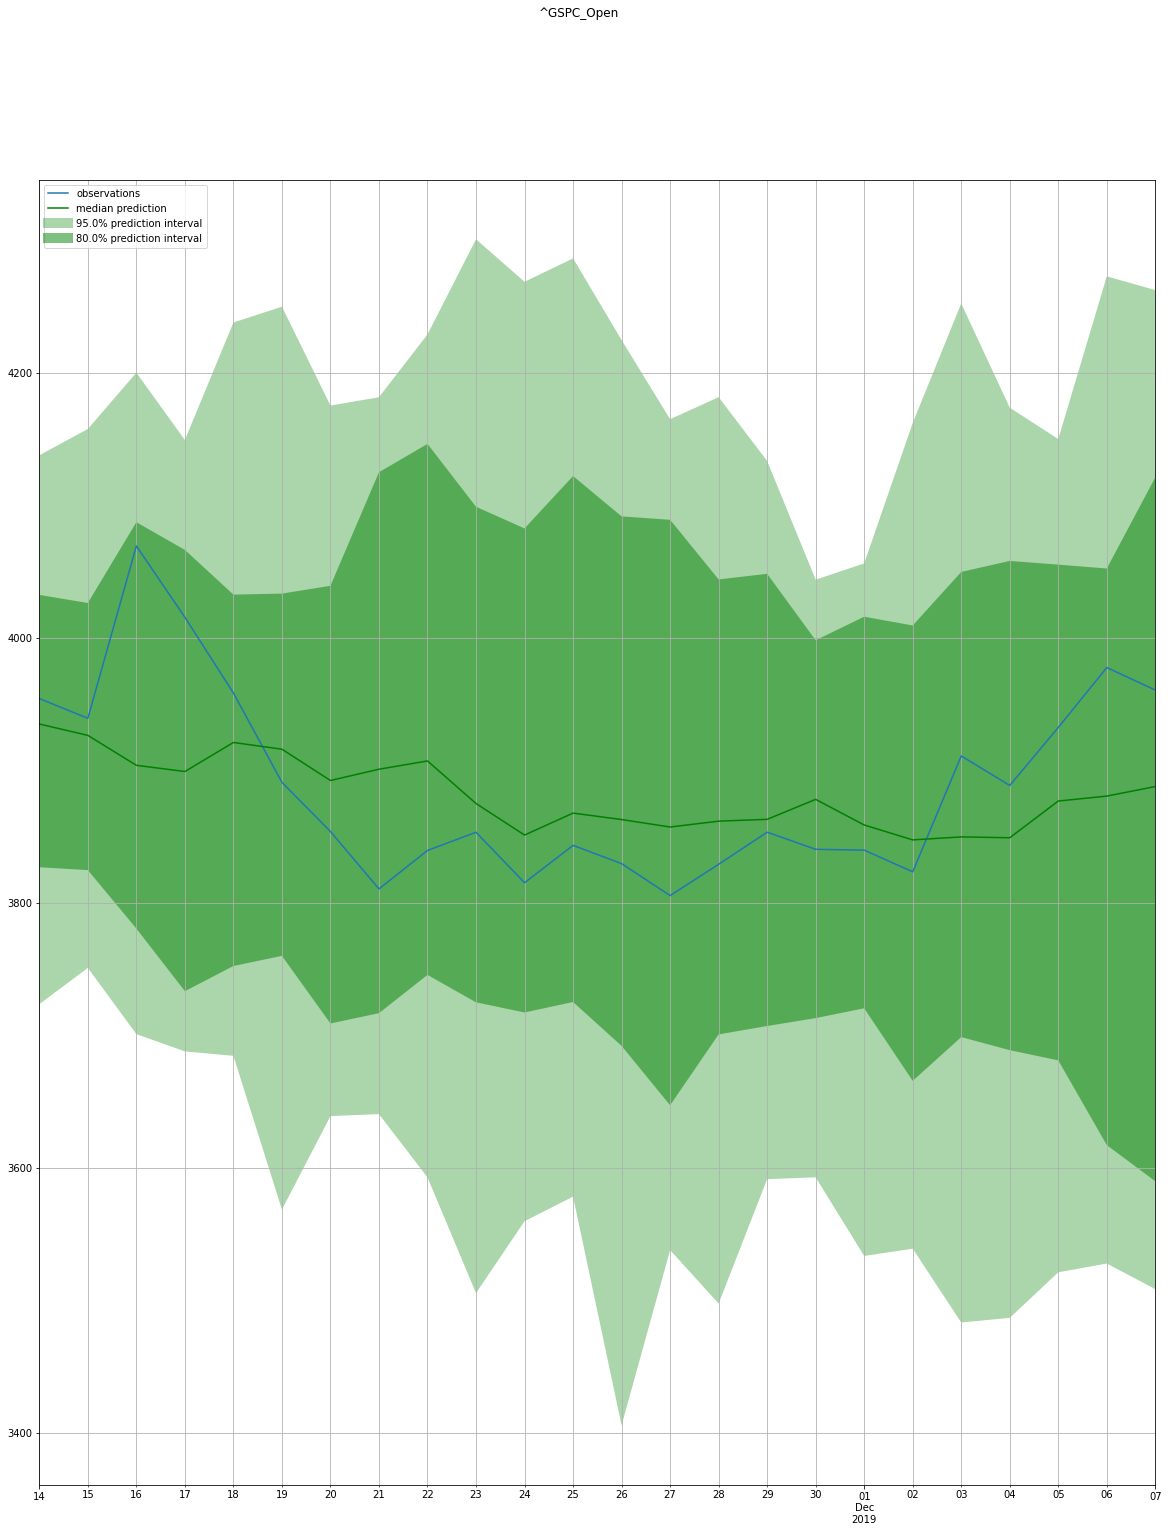

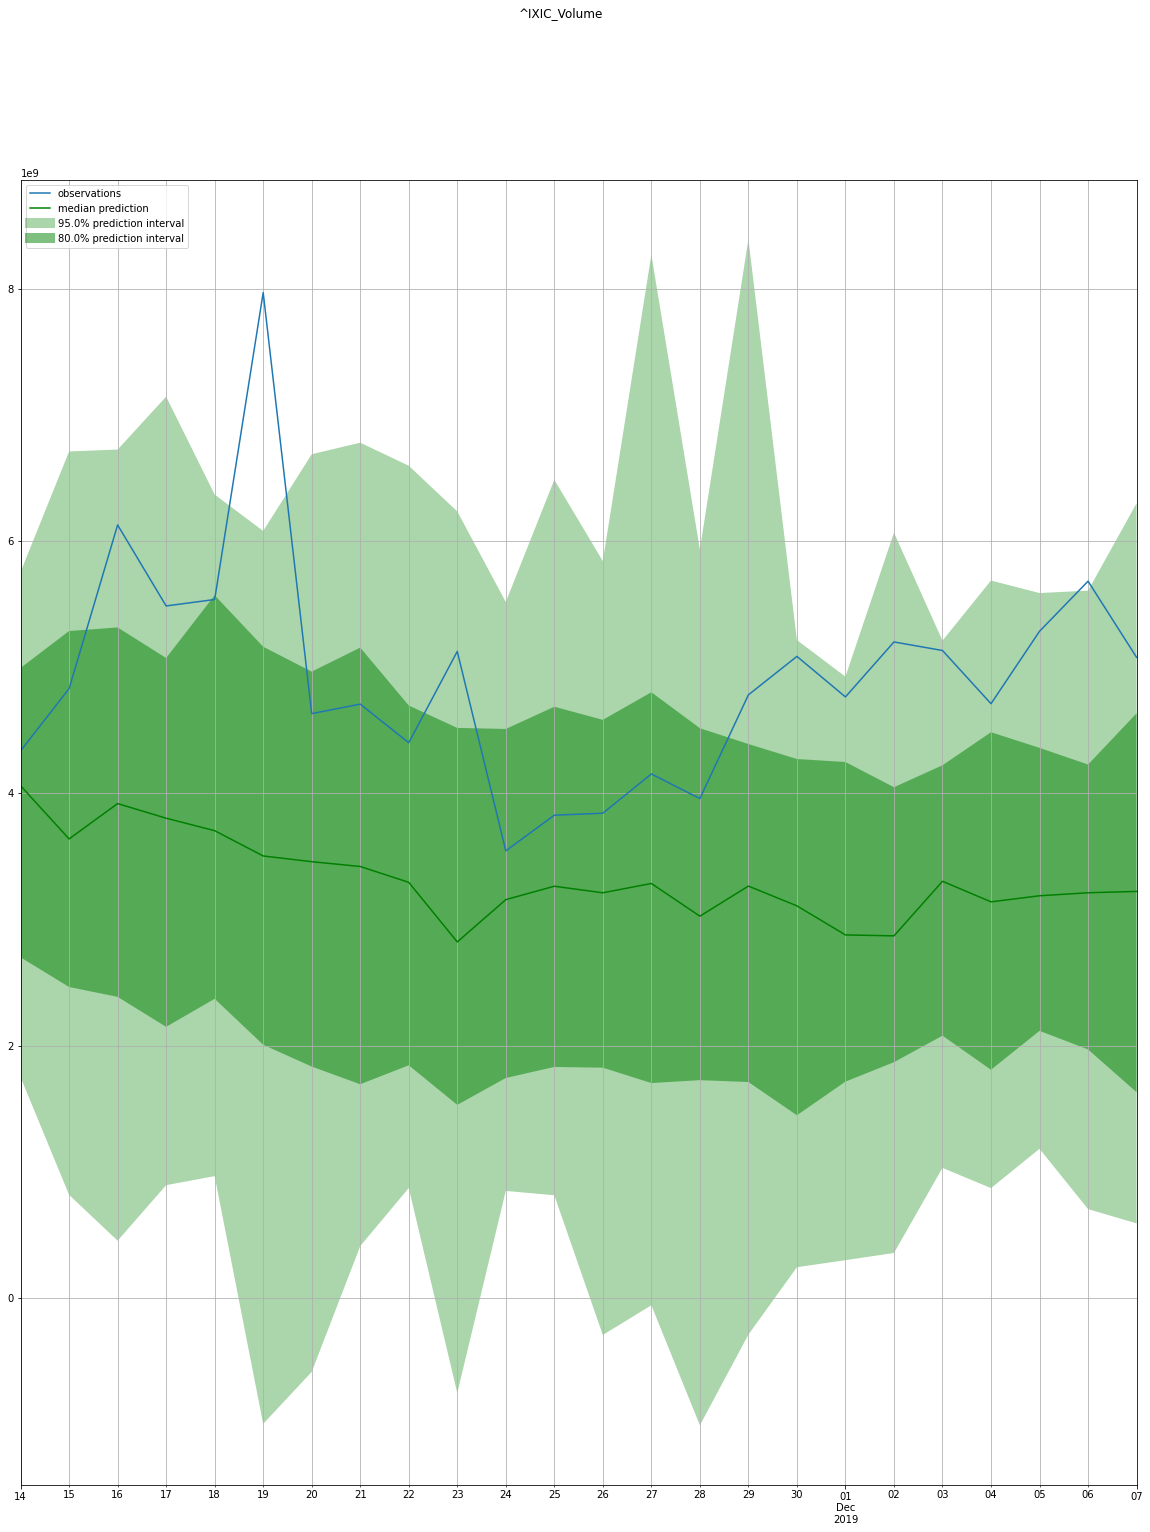

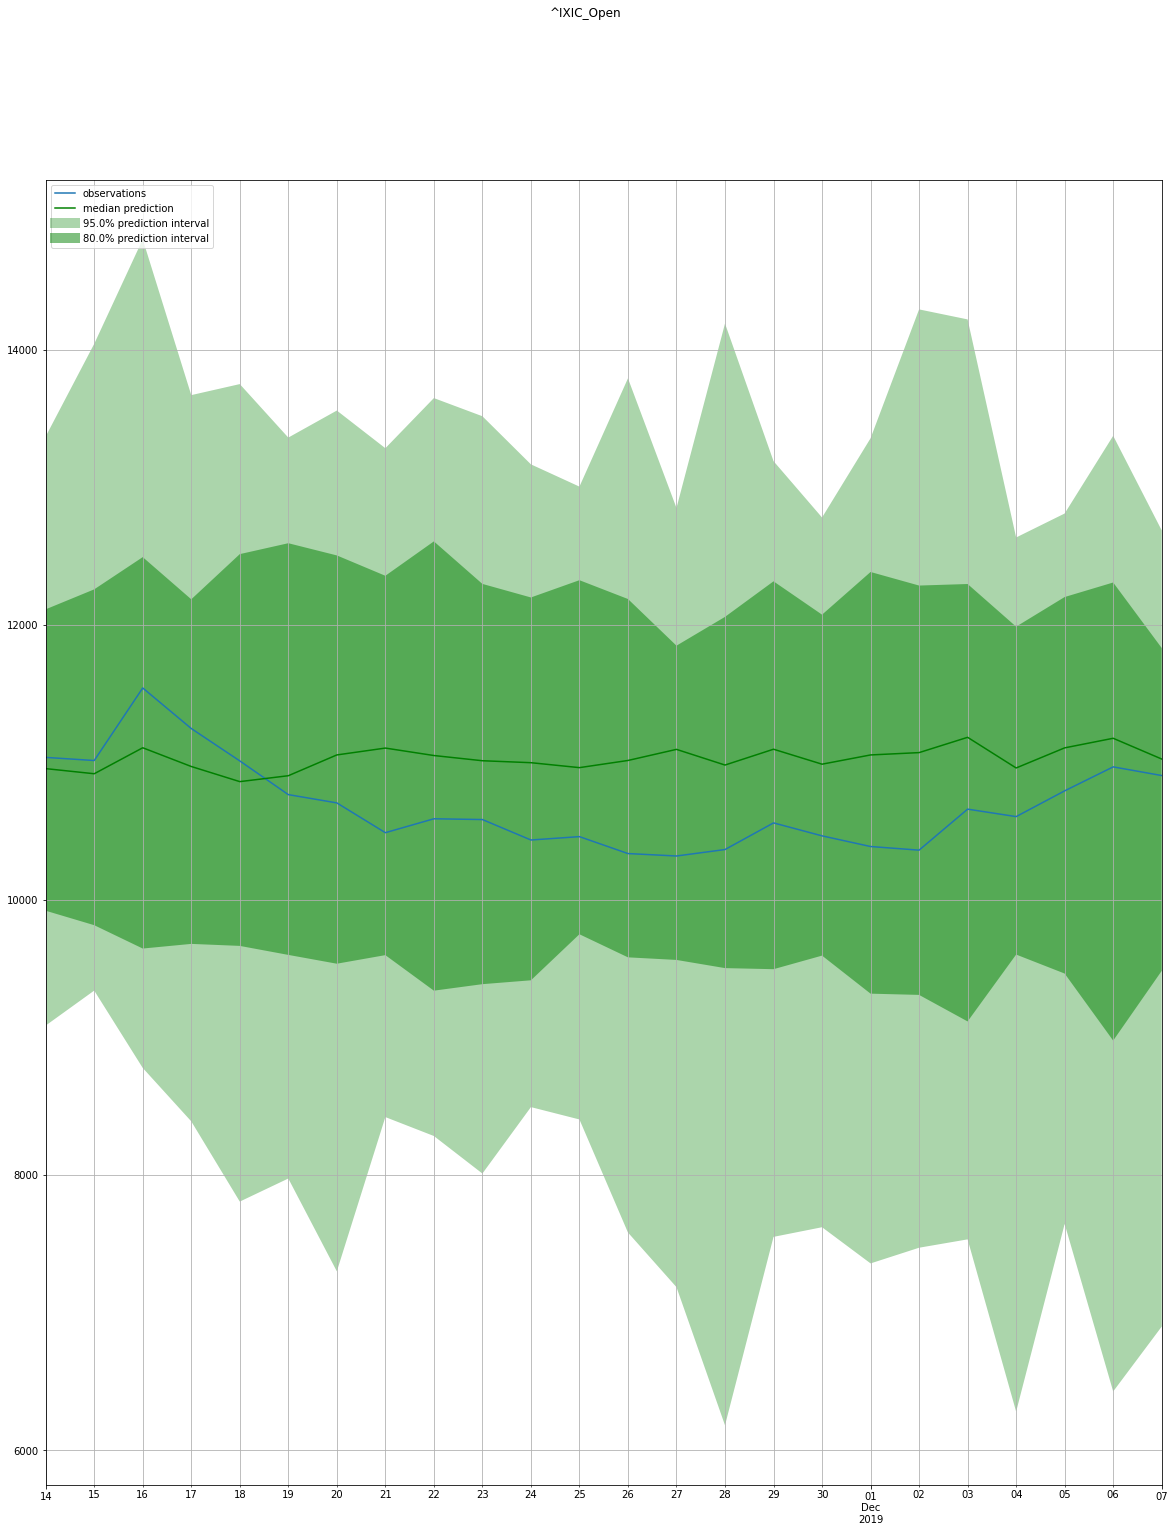

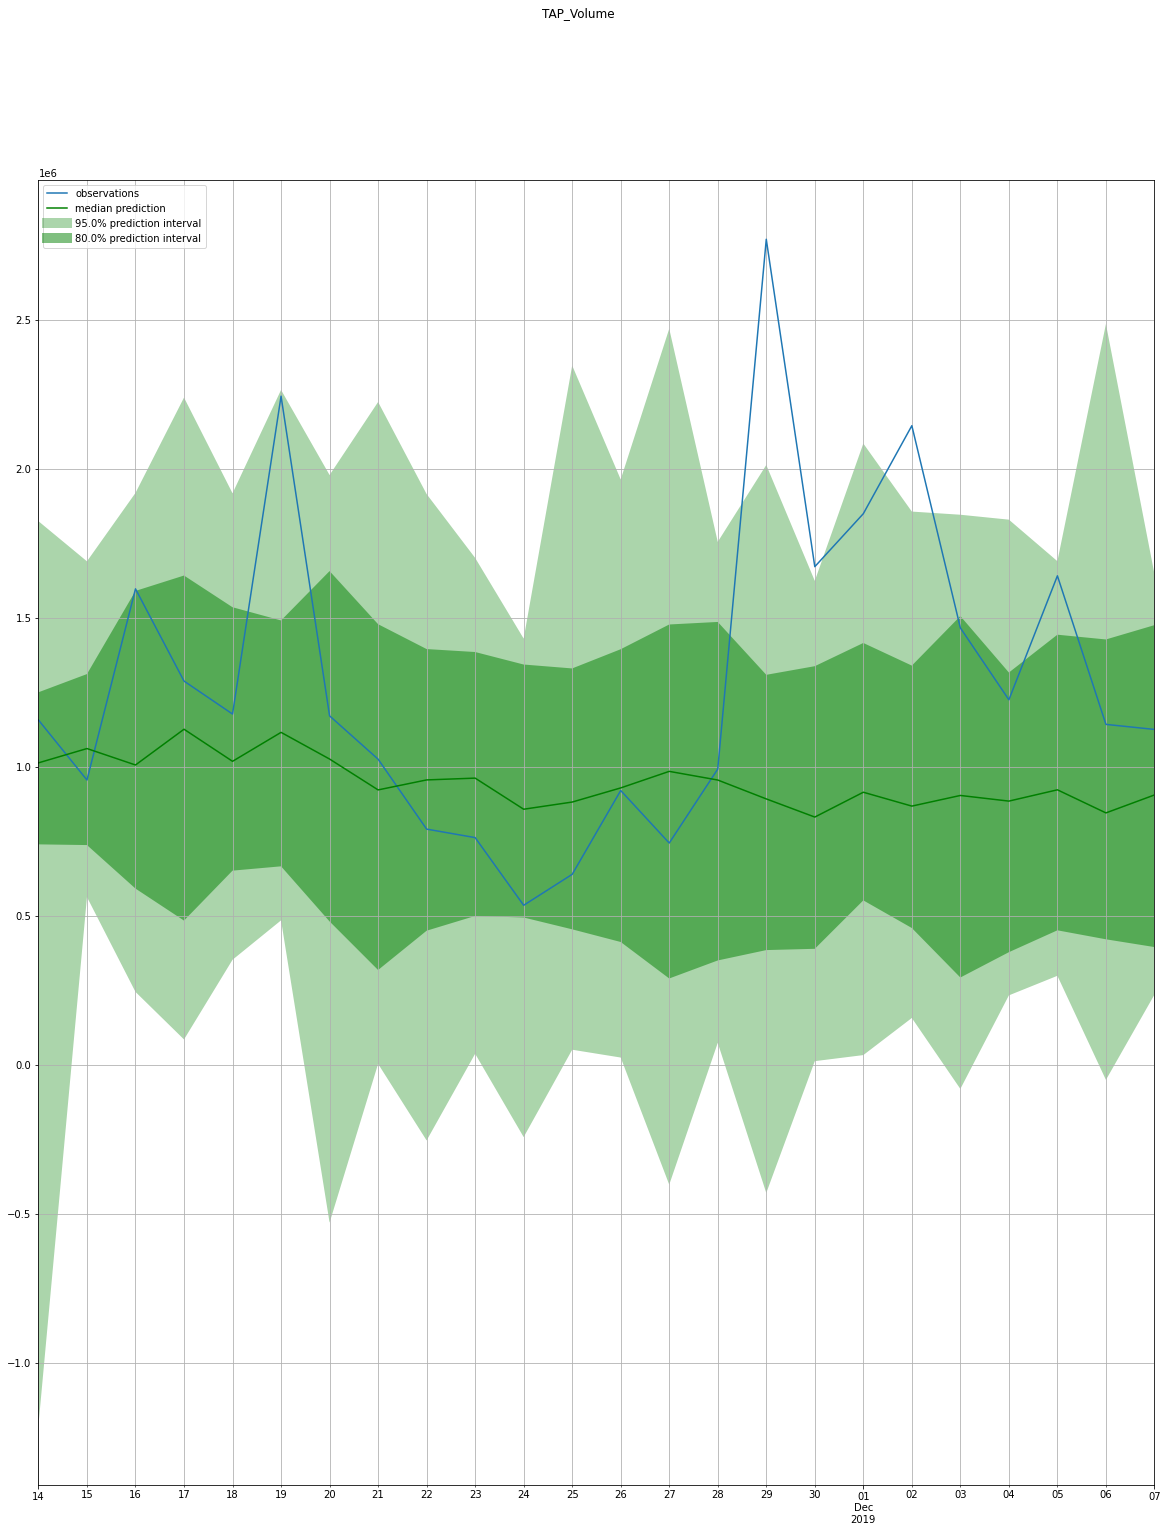

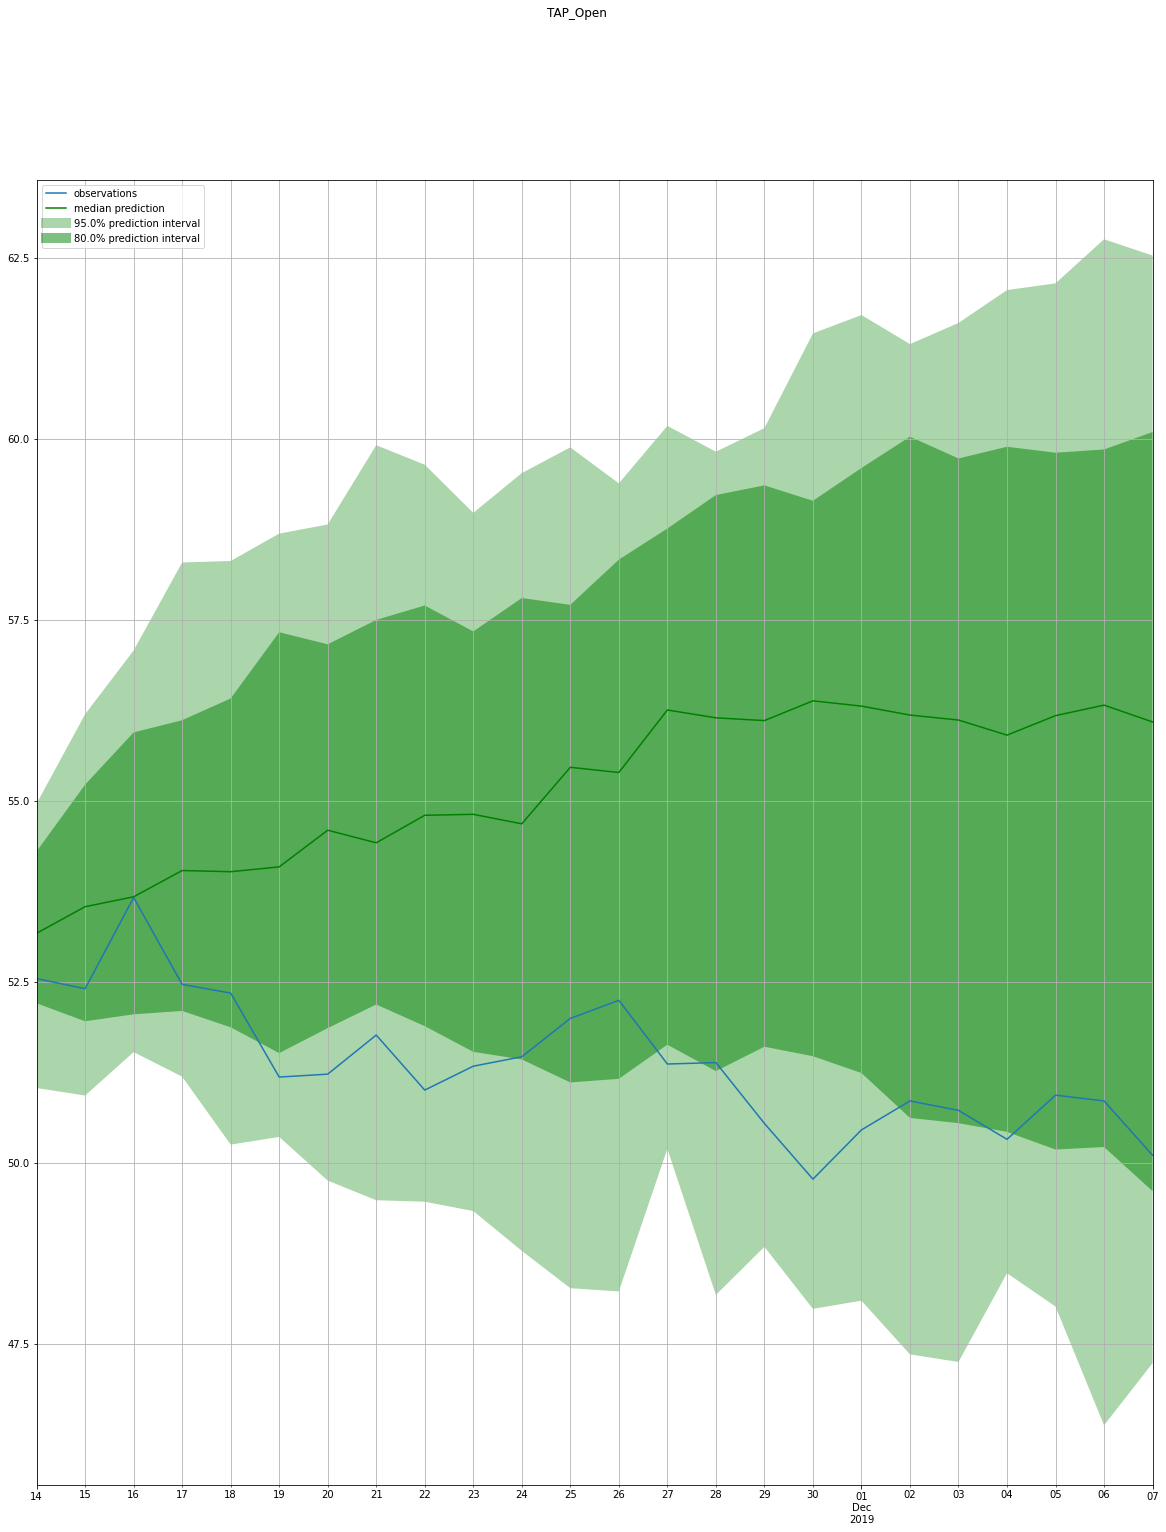

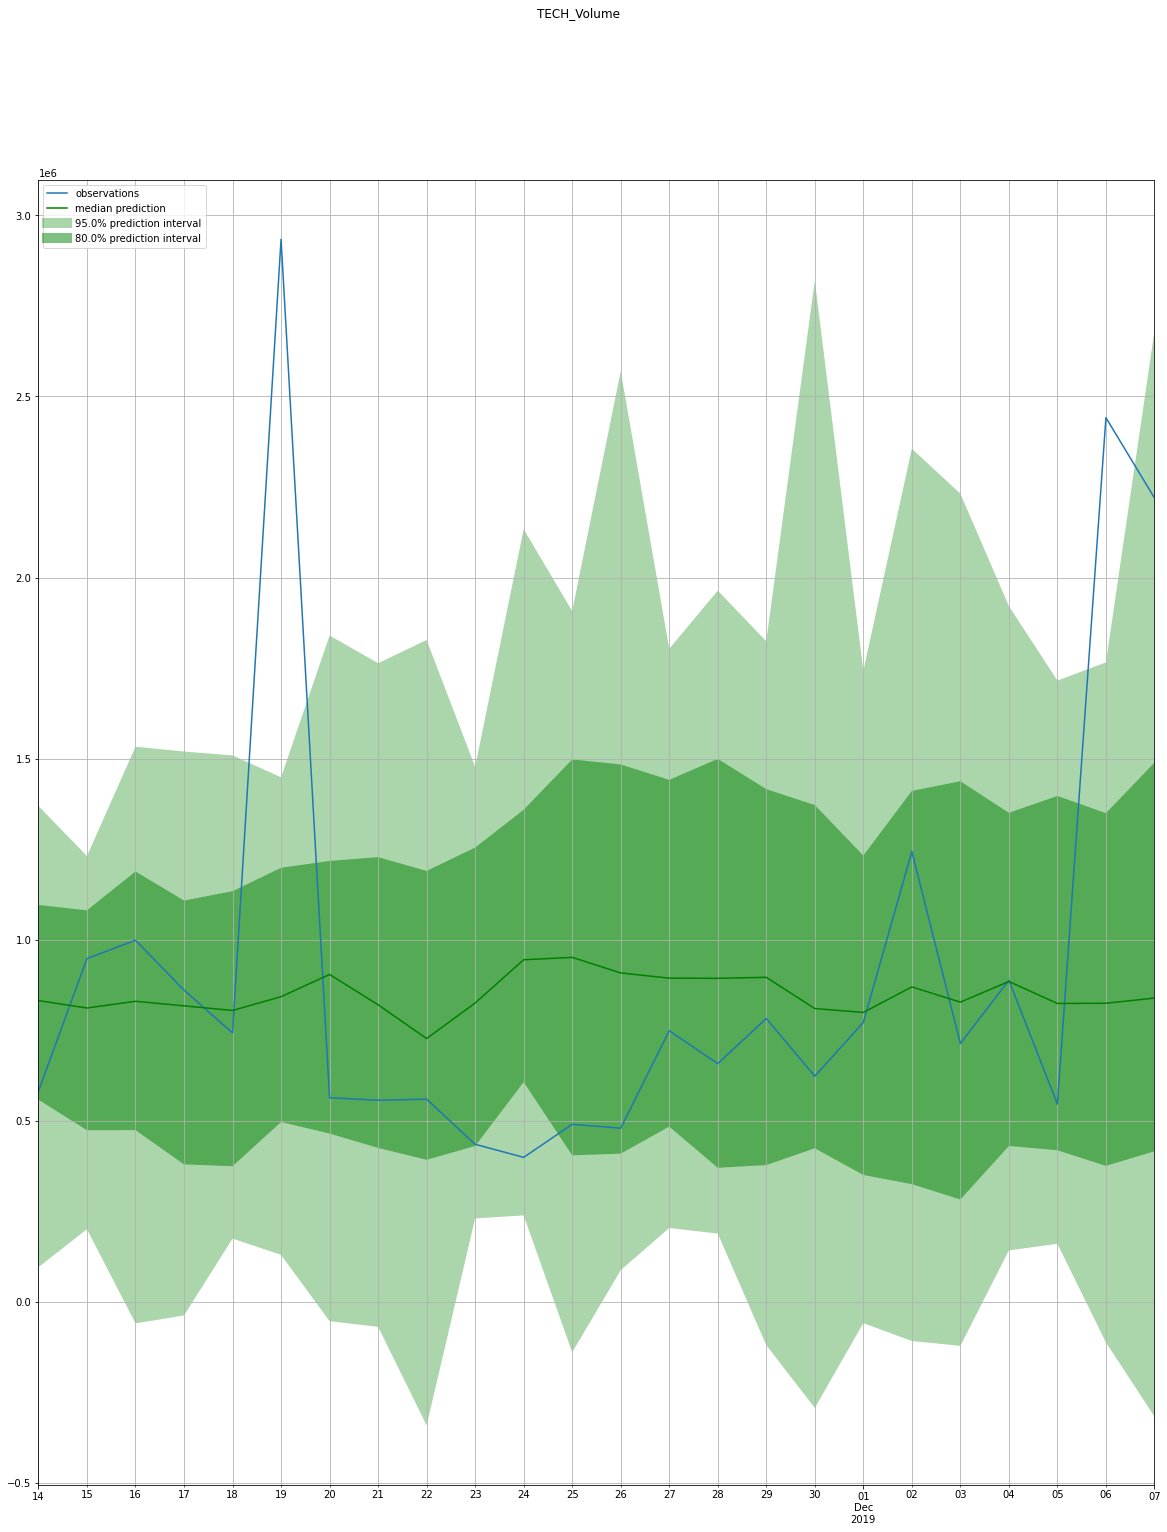

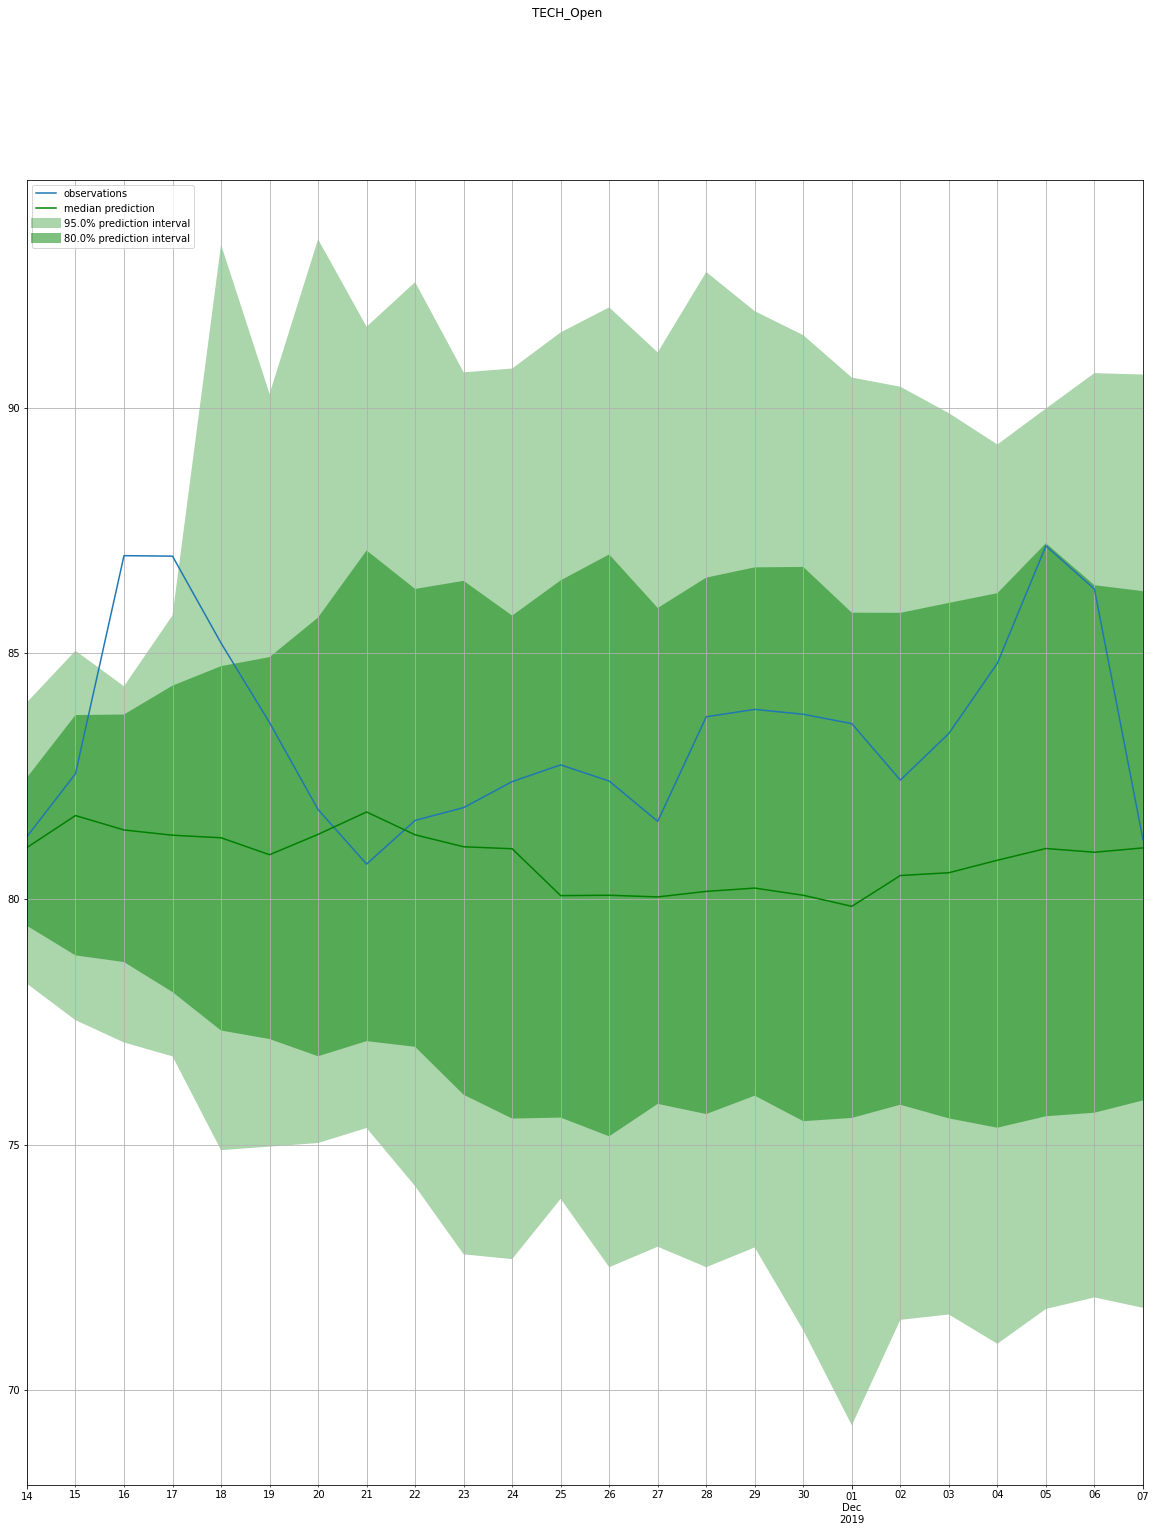

In [ ]:
for i in range(10):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)

In [ ]:
from gluonts.evaluation import Evaluator

evaluator = Evaluator()
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(test_data_lds))

import json
print(json.dumps(agg_metrics, indent=4))
item_metrics

Running evaluation: 100%|██████████| 1012/1012 [00:00<00:00, 17429.76it/s]


{
    "MSE": 8.432924732239827e+16,
    "abs_error": 122310813753.46175,
    "abs_target_sum": 323822694297.95575,
    "abs_target_mean": 13345808.370341068,
    "seasonal_error": 1578075.9734350704,
    "MASE": 3.129440191508935,
    "MAPE": 0.16966187601931765,
    "sMAPE": 0.17410544099631953,
    "MSIS": 26.1774278236027,
    "QuantileLoss[0.1]": 40663695518.86307,
    "Coverage[0.1]": 0.12392845367622815,
    "QuantileLoss[0.2]": 68441817649.458046,
    "Coverage[0.2]": 0.25111275964391694,
    "QuantileLoss[0.3]": 90513599236.37099,
    "Coverage[0.3]": 0.36861193537751397,
    "QuantileLoss[0.4]": 108162792532.16396,
    "Coverage[0.4]": 0.4747362347510715,
    "QuantileLoss[0.5]": 122310818732.99402,
    "Coverage[0.5]": 0.5704747774480712,
    "QuantileLoss[0.6]": 133712905424.22981,
    "Coverage[0.6]": 0.6521183646554567,
    "QuantileLoss[0.7]": 135707185060.43619,
    "Coverage[0.7]": 0.7340916584240027,
    "QuantileLoss[0.8]": 134207001253.4999,
    "Coverage[0.8]": 0.80

/usr/local/lib/python3.8/dist-packages/pandas/core/dtypes/cast.py:1201: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)


,item_id,forecast_start,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,...,QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.6],Coverage[0.6],QuantileLoss[0.7],Coverage[0.7],QuantileLoss[0.8],Coverage[0.8],QuantileLoss[0.9],Coverage[0.9]
0,^DJI_Volume,2019-11-14,8.057387e+19,4.580359e+10,5.182688e+10,2.159453e+09,4.450415e+07,42.883257,0.238113,0.313760,...,4.580359e+10,0.083333,5.454696e+10,0.166667,6.310828e+10,0.333333,7.165473e+10,0.583333,7.997708e+10,0.833333
1,^DJI_Open,2019-11-14,7.022622e+07,1.852827e+05,8.016905e+05,3.340377e+04,1.536723e+02,50.237486,0.231526,0.264986,...,1.852827e+05,0.000000,1.514172e+05,0.000000,8.480023e+04,0.208333,3.002376e+04,0.708333,3.817250e+04,1.000000
2,^GSPC_Volume,2019-11-14,1.328686e+18,2.036046e+10,9.697178e+10,4.040491e+09,4.523470e+08,1.875446,0.186620,0.215519,...,2.036046e+10,0.208333,2.074168e+10,0.250000,1.636442e+10,0.375000,1.239453e+10,0.625000,9.142423e+09,0.875000
3,^GSPC_Open,2019-11-14,4.015121e+03,1.189137e+03,9.333386e+04,3.888911e+03,1.869116e+01,2.650845,0.012645,0.012697,...,1.189137e+03,0.583333,1.294275e+03,0.625000,1.232916e+03,0.833333,1.162726e+03,0.916667,8.385110e+02,1.000000
4,^IXIC_Volume,2019-11-14,3.337075e+18,3.842354e+10,1.181938e+11,4.924744e+09,3.083964e+08,5.191308,0.308127,0.375381,...,3.842354e+10,0.000000,3.974260e+10,0.000000,3.760013e+10,0.083333,3.281181e+10,0.208333,2.183154e+10,0.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,AAPL_Open,2019-11-14,1.796240e+02,2.925511e+02,3.208090e+03,1.336704e+02,8.729376e-01,13.963920,0.093135,0.088149,...,2.925511e+02,0.916667,2.567585e+02,0.916667,2.168084e+02,0.916667,1.639093e+02,0.958333,9.727168e+01,0.958333
1008,Inflation,2019-11-14,6.922281e-02,5.640660e+00,1.853700e+02,7.723750e+00,3.173333e-02,7.406329,0.030758,0.030477,...,5.640660e+00,0.375000,5.121107e+00,0.375000,4.270264e+00,0.500000,3.514565e+00,0.750000,2.161379e+00,0.833333
1009,InterestRates,2019-11-14,3.653309e-01,1.218869e+01,9.842000e+01,4.100833e+00,7.248484e-03,70.064613,0.119561,0.130252,...,1.218869e+01,0.000000,1.384410e+01,0.000000,1.507959e+01,0.000000,1.572948e+01,0.000000,1.530722e+01,0.041667
1010,InteresUnemploymentRates,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
